<a href="https://colab.research.google.com/github/VasavSrivastava/MAT421/blob/main/Hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**19.1 Root Finding Problem Statement**  
Root finding is the process of determining a value $ x_r $ such that $ f(x_r) = 0 $. For simple functions like $ f(x) = x^2 - 9 $, the roots are clearly $ \pm 3 $, but for more complex functions like $ f(x) = \cos(x) - x $, finding an analytical solution is difficult. In such cases, numerical methods like **scipy's fsolve** can approximate the root by iteratively refining an estimate. However, not all functions have roots (e.g., $ f(x) = \frac{1}{x} $), and numerical solvers may fail or return inaccurate results when the function does not cross the x-axis.



Root: [0.73908513]
f(root) = [0.]


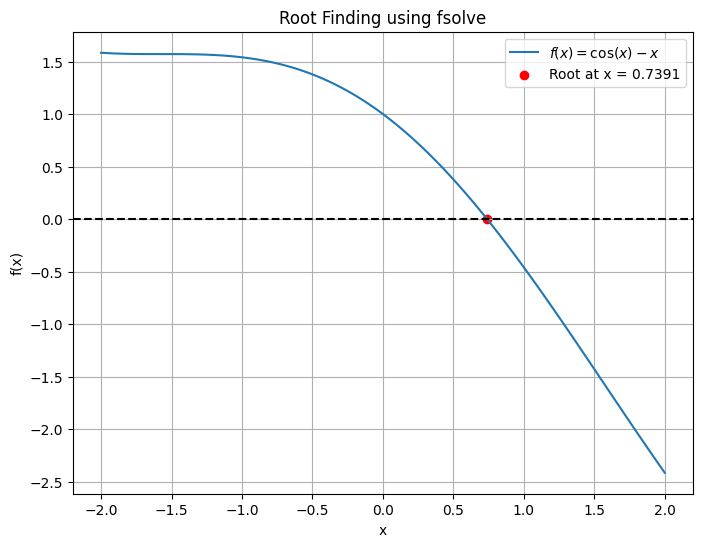

In [1]:
import numpy as np
from scipy import optimize

# Define the function whose root we want to find
f = lambda x: np.cos(x) - x

# Compute the root near x = -2
root = optimize.fsolve(f, -2)

# Verify that the solution is a root
result = f(root)
print("Root:", root)
print("f(root) =", result)  # Should be close to 0

# Plot the function and the root
import matplotlib.pyplot as plt

x_vals = np.linspace(-2, 2, 100)
y_vals = f(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label=r'$f(x) = \cos(x) - x$')
plt.axhline(0, color='black', linestyle='--')  # x-axis
plt.scatter(root, f(root), color='red', label=f'Root at x = {root[0]:.4f}')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Root Finding using fsolve")
plt.legend()
plt.grid()
plt.show()


#**19.2 Tolerance**  
In numerical computing, **tolerance** is the acceptable level of error in an algorithm’s solution. A program is said to have **converged** when the error is smaller than the predefined tolerance. In root-finding problems, one way to measure error is **absolute function error**, $( e = |f(x)| $), ensuring that the function value is close to zero. Another approach is **stepwise error**, $( e = |x_{i+1} - x_i| $), which ensures successive approximations are getting closer. The choice of tolerance depends on the problem context, as improper selection can lead to incorrect conclusions or unnecessary iterations.


Root found: 0.7390851332151607
f(root) = 0.0 (Should be <= 1e-06)


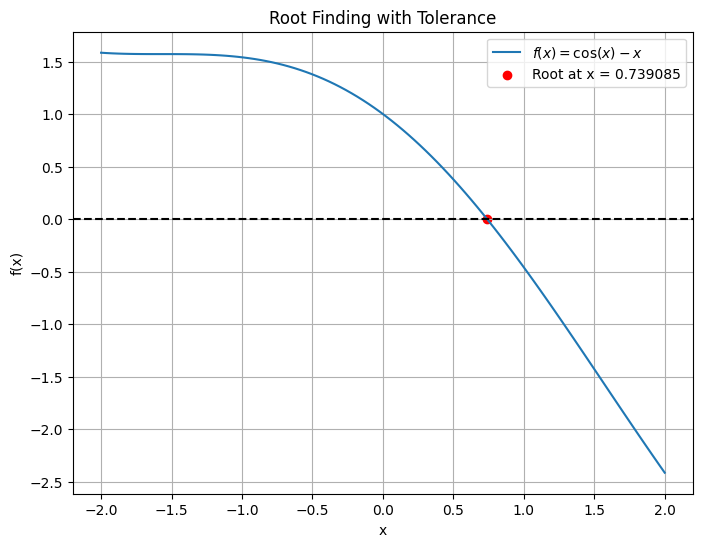

In [2]:
import numpy as np
from scipy.optimize import fsolve

# Define a function whose root we want to find
f = lambda x: np.cos(x) - x

# Set tolerance level
tol = 1e-6  # Acceptable level of error

# Use fsolve to compute the root with a specified tolerance
root = fsolve(f, -2, xtol=tol)

# Verify that the solution meets the tolerance criteria
error = abs(f(root))  # Absolute function error

# Print results
print(f"Root found: {root[0]}")
print(f"f(root) = {error[0]} (Should be <= {tol})")

# Plot the function with the found root
import matplotlib.pyplot as plt

x_vals = np.linspace(-2, 2, 100)
y_vals = f(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label=r'$f(x) = \cos(x) - x$')
plt.axhline(0, color='black', linestyle='--')  # x-axis
plt.scatter(root, f(root), color='red', label=f'Root at x = {root[0]:.6f}')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Root Finding with Tolerance")
plt.legend()
plt.grid()
plt.show()


#**19.3 Bisection Method**  
The **Bisection Method** is a numerical root-finding technique based on the **Intermediate Value Theorem**, which states that if a continuous function $ f(x) $ changes sign over an interval $ [a, b] $, then there must be a root in that interval. The method works by iteratively dividing the interval in half and selecting the subinterval where the sign change occurs.

The procedure:
1. Compute the midpoint $ m = \frac{a + b}{2} $.
2. Evaluate $ f(m) $:
   - If $ f(m) = 0 $, then $ m $ is the root.
   - If $ f(m) $ has the same sign as $ f(a) $, set $ a = m $.
   - If $ f(m) $ has the same sign as $ f(b) $, set $ b = m $.
3. Repeat until $ |f(m)| < \text{tol} $ (error tolerance).

The method guarantees convergence for continuous functions where $ f(a) $ and $ f(b) $ have opposite signs.


Approximated Root: 1.414214
f(root) = 1.617417e-06 (Should be close to 0)


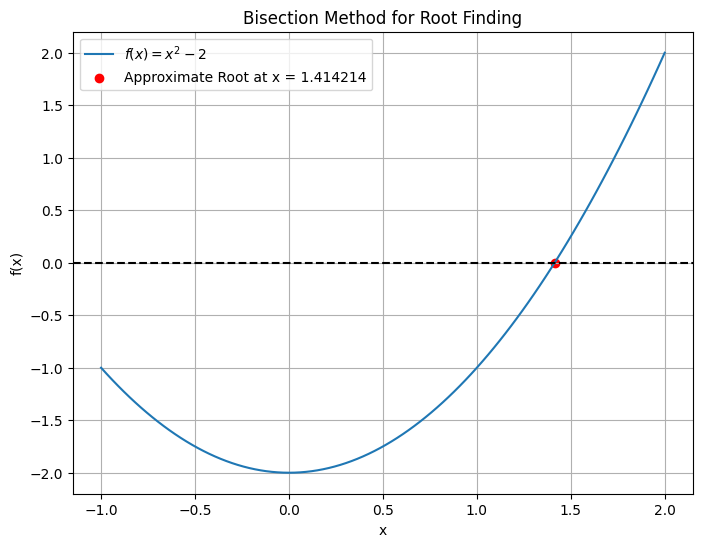

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Bisection Method Implementation
def my_bisection(f, a, b, tol):
    """
    Approximates a root of f in the interval [a, b] using the Bisection Method.
    Iterates until the absolute function error |f(m)| < tol.
    """
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception("The scalars a and b do not bound a root")  # Ensure the root exists in [a, b]

    while (b - a) / 2 > tol:
        m = (a + b) / 2  # Compute the midpoint
        if np.abs(f(m)) < tol:
            return m  # Return the root approximation if within tolerance
        elif np.sign(f(a)) == np.sign(f(m)):
            a = m  # Update a if f(m) has the same sign as f(a)
        else:
            b = m  # Update b if f(m) has the same sign as f(b)

    return (a + b) / 2  # Return the final approximation

# Define the function f(x) = x^2 - 2 (Root is sqrt(2))
f = lambda x: x**2 - 2

# Compute the root using the Bisection Method
a, b = 0, 2  # Interval [0,2]
tol = 1e-6  # Error tolerance
root = my_bisection(f, a, b, tol)

# Print results
print(f"Approximated Root: {root:.6f}")
print(f"f(root) = {f(root):.6e} (Should be close to 0)")

# Plot the function and the bisection iterations
x_vals = np.linspace(-1, 2, 100)
y_vals = f(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label=r'$f(x) = x^2 - 2$')
plt.axhline(0, color='black', linestyle='--')  # x-axis
plt.scatter(root, f(root), color='red', label=f'Approximate Root at x = {root:.6f}')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Bisection Method for Root Finding")
plt.legend()
plt.grid()
plt.show()


#**19.4 Newton-Raphson Method**  
The **Newton-Raphson Method** is an iterative numerical technique for finding roots of a function $ f(x) $. Given an initial guess $ x_0 $, the method refines this guess using the formula:

$$ x_i = x_{i-1} - \frac{f(x_{i-1})}{f'(x_{i-1})} $$

This formula is derived by approximating $ f(x) $ using a **linearization (tangent line)** and finding where it intersects the x-axis. The method converges **quadratically**, meaning it improves very quickly when $ x_0 $ is close to the actual root. However, it may fail if $ f'(x) $ is too small or if the function behaves poorly near the root.


Approximated Root: 1.414214
f(root) = 5.205633e-09 (Should be close to 0)
True sqrt(2) = 1.414214


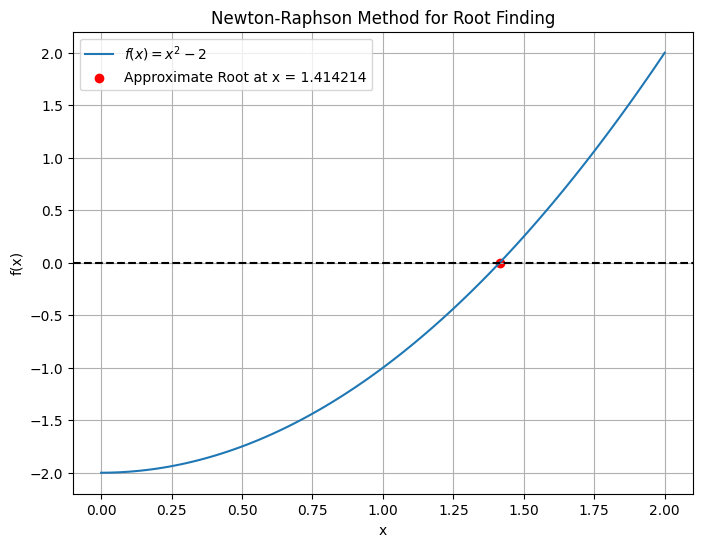

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Newton-Raphson Method Implementation
def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    """
    Approximates a root of f using the Newton-Raphson method.

    Parameters:
    - f: function whose root is to be found
    - df: derivative of the function
    - x0: initial guess
    - tol: tolerance level for stopping condition
    - max_iter: maximum iterations to prevent infinite loops

    Returns:
    - Estimated root of f
    """
    x = x0
    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)

        if abs(fx) < tol:
            return x  # Converged to a root

        if dfx == 0:
            raise ValueError("Derivative is zero. Newton-Raphson method fails.")

        x = x - fx / dfx  # Newton-Raphson formula

    raise ValueError("Maximum iterations reached. Method did not converge.")

# Define function f(x) = x^2 - 2 and its derivative f'(x) = 2x
f = lambda x: x**2 - 2
df = lambda x: 2*x

# Initial guess
x0 = 1.4  # Close to sqrt(2)

# Compute root using Newton-Raphson
root = newton_raphson(f, df, x0)

# Print results
print(f"Approximated Root: {root:.6f}")
print(f"f(root) = {f(root):.6e} (Should be close to 0)")

# Compare with sqrt(2)
true_root = np.sqrt(2)
print(f"True sqrt(2) = {true_root:.6f}")

# Plot function and Newton-Raphson iterations
x_vals = np.linspace(0, 2, 100)
y_vals = f(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label=r'$f(x) = x^2 - 2$')
plt.axhline(0, color='black', linestyle='--')  # x-axis
plt.scatter(root, f(root), color='red', label=f'Approximate Root at x = {root:.6f}')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Newton-Raphson Method for Root Finding")
plt.legend()
plt.grid()
plt.show()
